# Análise exploratória dos dados
_EDA - Exploratory Data Analysis_

---

## Sumário

1. **Importação de bibliotecas**
2. **Carregamento da base**
3. **Análise do dataframe**
   - 3.1. Volumetria
   - 3.2. Tipagem, Nulos e Cardinalidade
   - 3.3. Duplicidade
   - 3.4. Medidas Estatísticas
   - 3.5. Boxplot e Outliers das Variáveis Numéricas
   - 3.6. Distribuição das Variáveis Numéricas
   - 3.7. Análise da Distribuição das Variáveis Numéricas
4. **Análise exploratória dos dados**
   - 4.1. Análise demográfica
      - 4.1.1. Qual a distribuição da idade dos clientes?
      - 4.1.2. O gênero dos clientes está balanceado?
      - 4.1.3. Há diferença de idade média entre gêneros?
      - 4.1.4. O valor médio de compra difere entre gêneros?
      - 4.1.5. Idade influencia o valor do carro comprado?
      - 4.1.6. Existe uma faixa etária que tende a gastar mais?
   - 4.2. Análise financeira
      - 4.2.1. Como é a distribuição da renda anual?
      - 4.2.2. Qual a relação de entre renda e valor de compra?
      - 4.2.3. Clientes com mais dívida compram carros mais caros?
      - 4.2.4. O patrimônio líquido tem relação com o valor de compra?
      - 4.2.5. Renda, dívida e patrimônio são correlacionados entre si?
5. **Insights e recomendações**

<br>

---

<br>

## 1. Importação de bibliotecas

In [1]:
# Importação de pacotes e definição de parâmetros globais

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import textwrap
import warnings
import gc

from scipy import stats
from matplotlib.colors import LinearSegmentedColormap

In [2]:
# Configurações para exibição de dados no Jupyter Notebook

# Configurar opção para exibir todas as linhas do Dataframe
pd.set_option('display.max_rows', None)

# Configurar para exibir o conteúdo completo das colunas
pd.set_option('display.max_colwidth', None)

# Configurar a supressão de mensagens de aviso durante a execução
warnings.filterwarnings('ignore')

# Configurar estilo dos gráficos do seaborn
sns.set_style('whitegrid')

## 2. Carregamento da base

In [3]:
# Efetuando a limpeza da memória antes do carregamento dos dados
print(f'\nQuantidade de objetos removidos da memória: {gc.collect()}')


Quantidade de objetos removidos da memória: 0


In [4]:
# Criando um dataframe a partir do aquivo .csv
df = pd.read_csv('dados/Car_Purchasing_Data.csv', sep=',')
df.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradipiscing.co.uk,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248


## 3. Análise do dataframe

### 3.1. Volumetria

In [5]:
# Exibindo a quantidade de linhas e coluna do dataframe

print(f'Quantidade de linhas (registros):  {df.shape[0]}')
print(f'Quantidade de colunas (variáveis): {df.shape[1]}')    

Quantidade de linhas (registros):  500
Quantidade de colunas (variáveis): 9


### 3.2. Tipagem, Nulos e Cardinalidade

In [6]:
def gerar_metadados(dataframe):
    '''
    Gera um dataframe contendo metadados das colunas do dataframe fornecido.

    :param dataframe: Dataframe
        DataFrame para o qual os metadados serão gerados.
    :return: DataFrame
        DataFrame contendo os metadados.
    '''
    metadados = pd.DataFrame({
        'Variável': dataframe.columns,
        'Tipo': dataframe.dtypes,
        'Qtde de nulos': dataframe.isnull().sum(),
        '% de nulos': round((dataframe.isnull().sum()/len(dataframe))*100, 2),
        'Cardinalidade': dataframe.nunique(),
    })
    metadados = metadados.sort_values(by='Qtde de nulos', ascending=False)
    metadados = metadados.reset_index(drop=True)
    return metadados

In [7]:
# Exibindo os metadados do dataframe

gerar_metadados(df)

,Variável,Tipo,Qtde de nulos,% de nulos,Cardinalidade
0,Customer Name,object,0,0.0,498
1,Customer e-mail,object,0,0.0,500
2,Country,object,0,0.0,1
3,Gender,int64,0,0.0,2
4,Age,int64,0,0.0,43
5,Annual Salary,float64,0,0.0,500
6,Credit Card Debt,float64,0,0.0,500
7,Net Worth,float64,0,0.0,500
8,Car Purchase Amount,float64,0,0.0,500


### 3.3. Duplicidade

In [8]:
# Exibindo a quantidade de registros únicos e duplicados

contagem_duplicatas = df.duplicated().value_counts().rename(
    index={False: 'Registros únicos', True: 'Registros duplicados'})
print(contagem_duplicatas)


Registros únicos    500
Name: count, dtype: int64


### 3.4. Medidas Estatísticas

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,500.0,0.506000,0.500465,0.0,0.000000,1.000000,1.000000,1.0
Age,500.0,46.224000,7.990339,20.0,41.000000,46.000000,52.000000,70.0
Annual Salary,500.0,62127.239608,11703.378228,20000.0,54391.977195,62915.497035,70117.862005,100000.0
Credit Card Debt,500.0,9607.645049,3489.187973,100.0,7397.515792,9655.035568,11798.867487,20000.0
Net Worth,500.0,431475.713625,173536.756340,20000.0,299824.195900,426750.120650,557324.478725,1000000.0
Car Purchase Amount,500.0,44209.799218,10773.178744,9000.0,37629.896040,43997.783390,51254.709517,80000.0


In [10]:
df.describe(exclude=('float','int')).T

,count,unique,top,freq
Customer Name,500,498,Seth,2
Customer e-mail,500,500,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,1
Country,500,1,USA,500


### 3.5. Boxplot e Outliers das Variáveis Numéricas

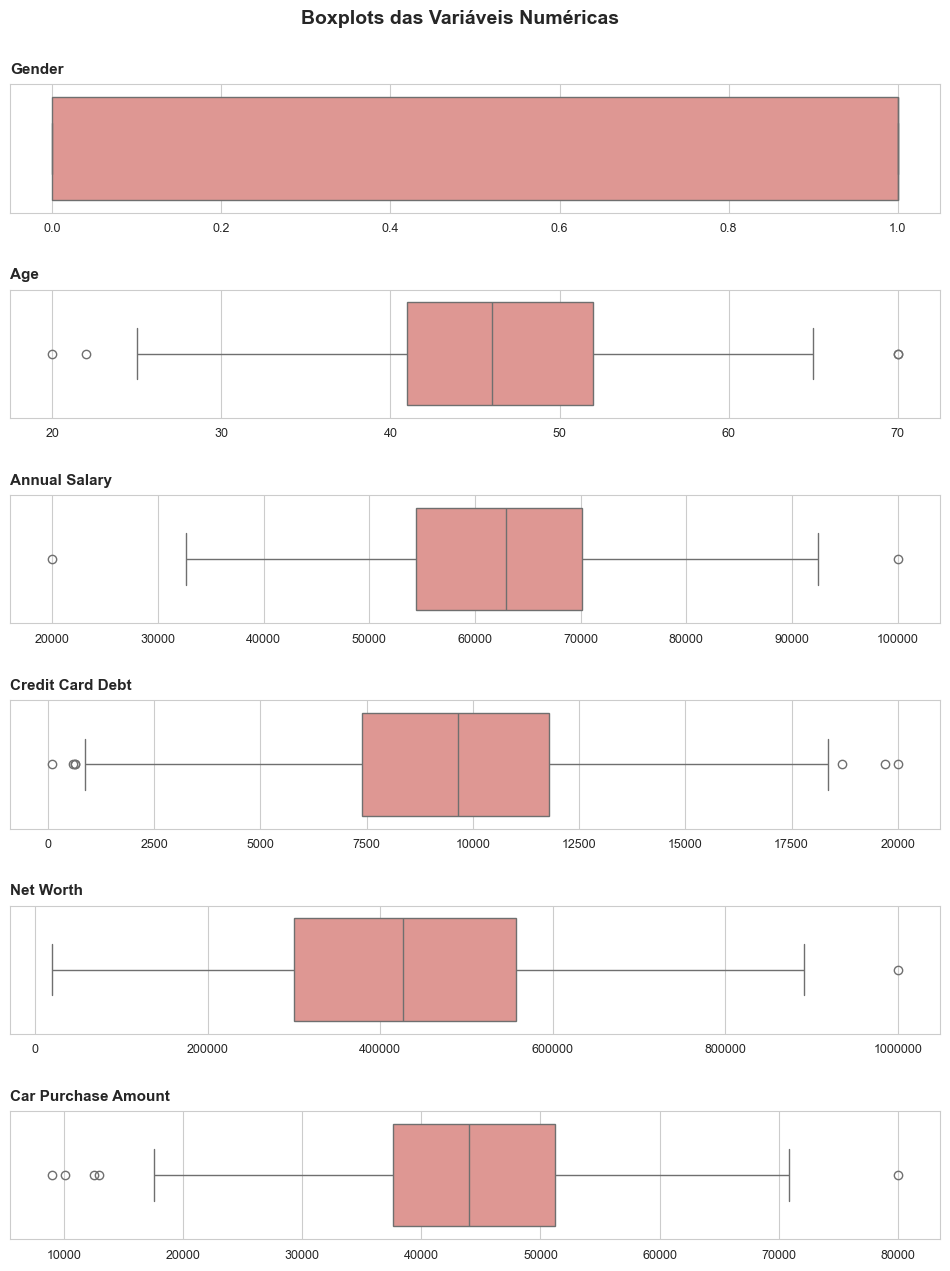

In [11]:
# Seleciona os nomes das colunas numéricas (float apenas)
colunas_numericas = df.select_dtypes(include=['number']).columns.tolist()

# Verifica se há colunas numéricas
if not colunas_numericas:
    print('Nenhuma variável numérica encontrada no DataFrame.')
else:
    # Número de boxplots a serem gerados
    n_plots = len(colunas_numericas)

    # Cria a figura com subplots verticais
    fig, axs = plt.subplots(n_plots, 1, figsize=(12, 2.5 * n_plots), 
                            gridspec_kw={'hspace': 0.6})

    # Garante que axs seja sempre uma lista (mesmo com 1 gráfico)
    if n_plots == 1:
        axs = [axs]

    # Loop pelas colunas para criar os boxplots
    for ax, col in zip(axs, colunas_numericas):
        sns.boxplot(x=df[col], ax=ax, color='#ea8c87', orient='h')
        ax.set_title(f'{col}', loc='left', fontsize=11, pad=8, fontweight='bold')
        ax.set(xlabel='', ylabel='')
        ax.tick_params(labelsize=9)
        ax.ticklabel_format(style='plain', axis='x')

    # Ajusta o layout e adiciona título geral
    fig.suptitle('Boxplots das Variáveis Numéricas', fontsize=14, fontweight='bold', y=0.93)
    plt.tight_layout(rect=[0, 0, 1, 0.97])  # evita sobreposição com título
    plt.show()


In [12]:
# Seleciona as variáveis numéricas
colunas_numericas = df.select_dtypes(include=['number'])

# Lista para armazenar as informações de outliers por coluna
resultados_outliers = []

for col in colunas_numericas:
    # Calcula quartis e intervalo interquartil (IIQ)
    Q1 = df[col].quantile(.25)
    Q3 = df[col].quantile(.75)
    IIQ = Q3 - Q1

    # Define limites inferior e superior para outliers
    limite_inferior = Q1 - 1.5 * IIQ
    limite_superior = Q3 + 1.5 * IIQ

    # Contagem de outliers abaixo e acima dos limites
    outliers_abaixo = (df[col] < limite_inferior).sum()
    outliers_acima = (df[col] > limite_superior).sum()
    
    # Calcula a quantidade total de outliers fora dos limites
    total_outliers = outliers_acima + outliers_abaixo
    
    # Calcula a porcentagem total de outliers fora dos limites
    total_outliers_perc = total_outliers / df.shape[0]
    
    # Armazena resultados em um dicionário
    resultados_outliers.append({
        'Variável': col,
        'IIQ': IIQ,
        'Limite Inferior': limite_inferior,
        'Limite Superior': limite_superior,
        'Outliers Abaixo': outliers_abaixo,
        'Outliers Acima': outliers_acima,
        'Total Outliers': total_outliers,
        '% Outliers': round(total_outliers_perc * 100, 3)
    })
    
# Converte a lista de dicionários em um DataFrame
df_outliers = pd.DataFrame(resultados_outliers) 

# Ordena o DataFrame pela % de outliers em ordem decrescente
df_outliers.sort_values(by='% Outliers', ascending=False, inplace=True)  

# Exibe o DataFrame com os resultados
print('\nResumo dos Outliers por Variável (ordenado por maior %)')
display(df_outliers.reset_index(drop=True))


Resumo dos Outliers por Variável (ordenado por maior %)


,Variável,IIQ,Limite Inferior,Limite Superior,Outliers Abaixo,Outliers Acima,Total Outliers,% Outliers
0,Credit Card Debt,4401.351696,795.488248,18400.895031,4,3,7,1.4
1,Car Purchase Amount,13624.813477,17192.675824,71691.929734,4,1,5,1.0
2,Age,11.000000,24.500000,68.500000,2,2,4,0.8
3,Annual Salary,15725.884810,30803.149980,93706.689220,1,1,2,0.4
4,Net Worth,257500.282825,-86426.228337,943574.902962,0,1,1,0.2
5,Gender,1.000000,-1.500000,2.500000,0,0,0,0.0


Os boxplots permitem observar a distribuição, dispersão e presença de outliers nas variáveis numéricas do dataset.

- **Gender**: variável binária (0 e 1), sem dispersão nem outliers, como esperado para variável categórica codificada.
- **Age**: apresenta distribuição relativamente simétrica, com poucos outliers abaixo de 25 e acima de 68 anos, representando casos isolados de clientes mais jovens ou mais velhos.
- **Annual Salary**: concentrada aproximadamente entre 33.000 e 93.000, com apenas dois outliers (um abaixo e um acima). Indica consistência salarial entre clientes, sem grandes extremos.
- **Credit Card Debt**: leve assimetria à direita, com 7 outliers (1,4%) em valores muito baixos e muito altos, indicando alguns clientes com dívidas excepcionalmente baixas ou altas.
- **Net Worth**: ampla variação de patrimônio líquido, variando de zero a quase 1 milhão sendo este o outlier acima do limite superior. Mostra que há clientes de perfis financeiros muito distintos.
- **Car Purchase Amount**: distribuição equilibrada, com poucos outliers (1%), principalmente compras muito baixas, representando clientes de menor poder aquisitivo.

A presença de outliers é baixa em todas as variáveis (≤ 1,4%), o que indica boa qualidade dos dados e baixa necessidade de tratamento extremo.
Os poucos outliers identificados podem representar casos reais de comportamento atípico, e devem ser analisados com cautela antes de qualquer remoção, especialmente se tiverem relevância de negócio, por exemplo, clientes premium ou endividados.

### 3.6. Distribuição das Variáveis Numéricas

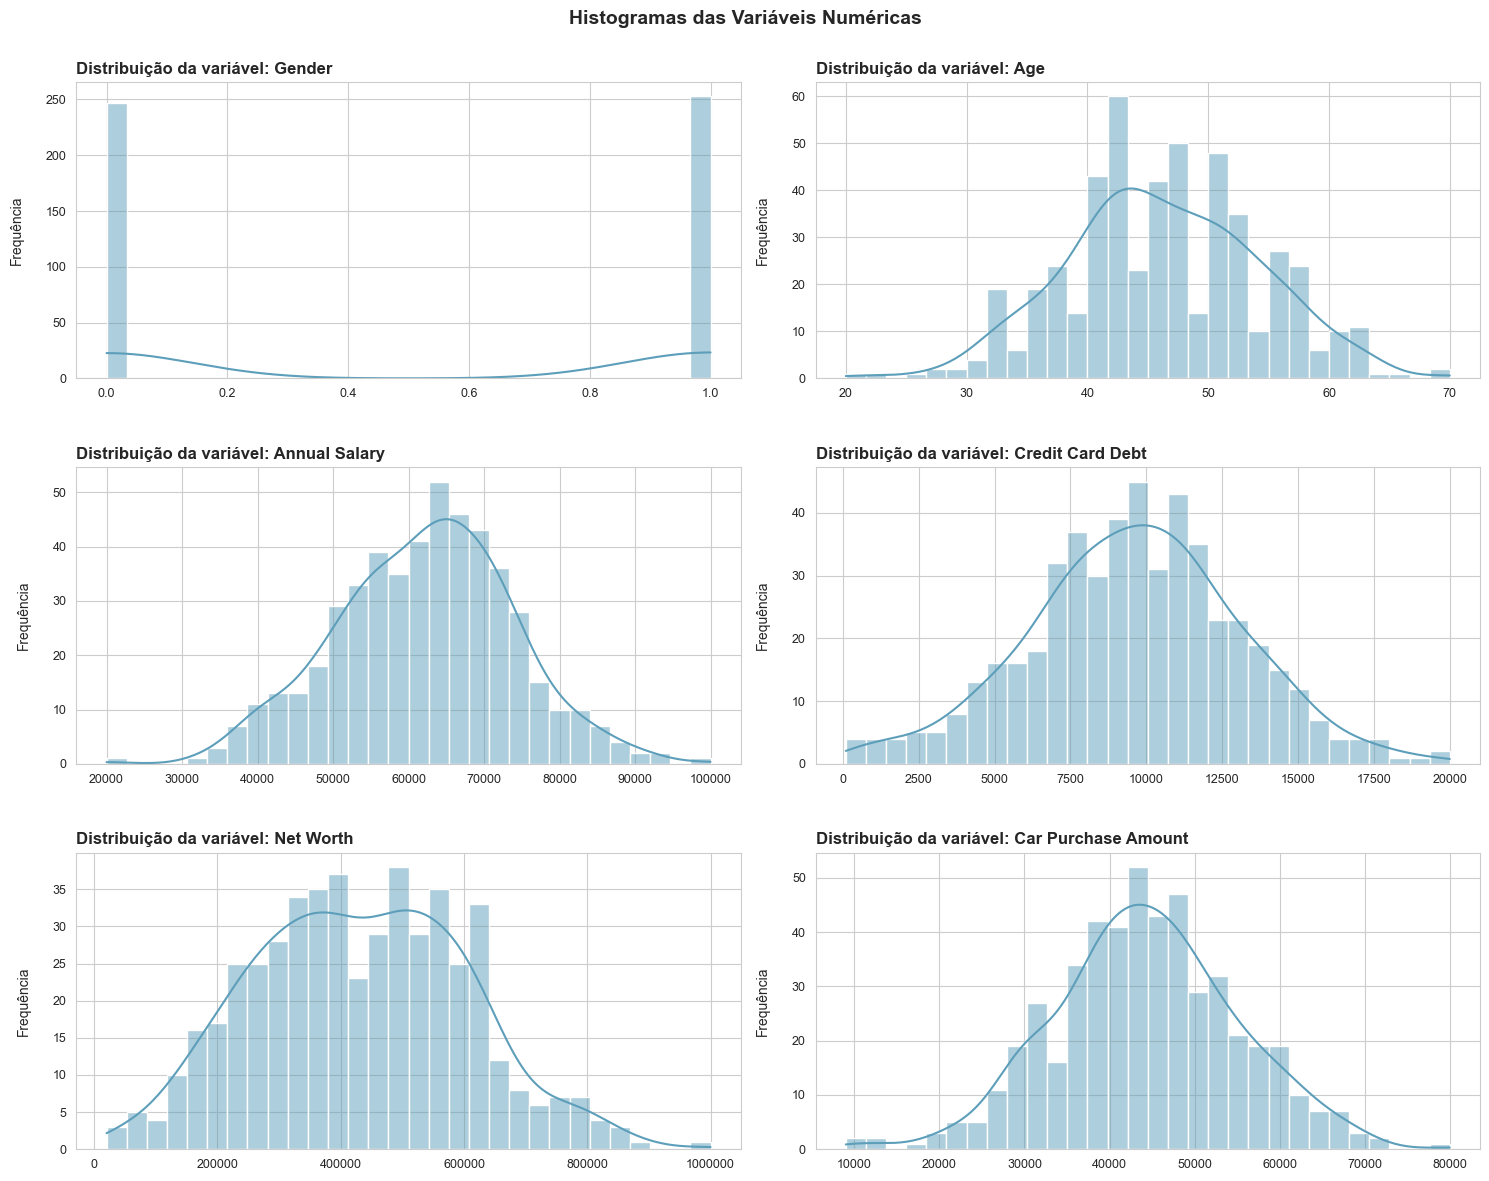

In [13]:
# Seleciona as variáveis numéricas
colunas_numericas = df.select_dtypes(include=['float', 'int']).columns

# Calcula a quantidade de subplots necessários
qtde_subplots = len(colunas_numericas)

# Configuração para múltiplos gráficos: 2 colunas por linha
colunas_subplot = 2
qtde_linhas = -(-qtde_subplots // colunas_subplot)

# Criação da figura com subplots
fig, axs = plt.subplots(qtde_linhas, colunas_subplot, figsize=(15, 4 * qtde_linhas))

# Transformação do array de subplots para facilitar o loop
axs = axs.flatten()

# Remove subplots vazios, caso existam
for i in range(qtde_subplots, len(axs)):
    fig.delaxes(axs[i])

# Loop sobre as variáveis numéricas para criar os histogramas
for i, coluna in enumerate(colunas_numericas):
    sns.histplot(data=df, x=coluna, ax=axs[i], bins=30, kde=True, color='#5d9eba', edgecolor='#ffffff')

    # Configura o título e remove os rótulos dos eixos
    axs[i].set_title(f'Distribuição da variável: {coluna}', fontsize=12, loc='left', fontweight='bold')
    axs[i].set(xlabel='', ylabel='Frequência\n')

    # Ajusta o tamanho dos rótulos
    axs[i].tick_params(labelsize=9)

    # Exibe rótulos sem notação científica
    axs[i].ticklabel_format(style='plain', axis='x')

# Adiciona um título geral
fig.suptitle('Histogramas das Variáveis Numéricas', fontsize=14, fontweight='bold')

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.subplots_adjust(hspace=0.3, top=0.92)  # Mais espaço entre os gráficos
plt.show()

### 3.7. Análise da Distribuição das Variáveis Numéricas

In [14]:
def testar_normalidade(dataframe, coluna):
    '''
    Realiza testes estatísticos de normalidade (Shapiro-Wilk e D’Agostino-Pearson)
    para a variável numérica especificada.

    :param dataframe: DataFrame
        DataFrame contendo os dados a serem analisados.
    :param coluna: str
        Nome da coluna numérica a ser testada.
    :return: None
        Exibe os resultados dos testes e interpretação.
    '''

    # Remove valores ausentes da amostra
    amostra = dataframe[coluna].dropna()

    # Teste de Shapiro-Wilk
    shapiro_stat, shapiro_p = stats.shapiro(amostra)

    # Teste de D’Agostino-Pearson
    dagostino_stat, dagostino_p = stats.normaltest(amostra)

    # Exibição dos resultados
    print(f'\n📌 Teste de Normalidade — {coluna}\n')
    print(f'- Shapiro-Wilk:       Estatística = {shapiro_stat:.4f} | p-valor = {shapiro_p:.4f}')
    print(f'- D\'Agostino-Pearson: Estatística = {dagostino_stat:.4f} | p-valor = {dagostino_p:.4f}\n')

    # Interpretação
    if shapiro_p > 0.05 and dagostino_p > 0.05:
        print('✅ A variável apresenta distribuição normal (não rejeita H₀ nos dois testes).')
    else:
        print('⚠️ A variável não apresenta distribuição normal (rejeita H₀ em pelo menos um teste).')


In [15]:
testar_normalidade(df, 'Gender')


📌 Teste de Normalidade — Gender

- Shapiro-Wilk:       Estatística = 0.6365 | p-valor = 0.0000
- D'Agostino-Pearson: Estatística = 2070.7056 | p-valor = 0.0000

⚠️ A variável não apresenta distribuição normal (rejeita H₀ em pelo menos um teste).


In [16]:
testar_normalidade(df, 'Age')


📌 Teste de Normalidade — Age

- Shapiro-Wilk:       Estatística = 0.9964 | p-valor = 0.3129
- D'Agostino-Pearson: Estatística = 0.0680 | p-valor = 0.9666

✅ A variável apresenta distribuição normal (não rejeita H₀ nos dois testes).


In [17]:
testar_normalidade(df, 'Annual Salary')


📌 Teste de Normalidade — Annual Salary

- Shapiro-Wilk:       Estatística = 0.9974 | p-valor = 0.6341
- D'Agostino-Pearson: Estatística = 0.9318 | p-valor = 0.6276

✅ A variável apresenta distribuição normal (não rejeita H₀ nos dois testes).


In [18]:
testar_normalidade(df, 'Credit Card Debt')


📌 Teste de Normalidade — Credit Card Debt

- Shapiro-Wilk:       Estatística = 0.9972 | p-valor = 0.5690
- D'Agostino-Pearson: Estatística = 0.6415 | p-valor = 0.7256

✅ A variável apresenta distribuição normal (não rejeita H₀ nos dois testes).


In [19]:
testar_normalidade(df, 'Net Worth')


📌 Teste de Normalidade — Net Worth

- Shapiro-Wilk:       Estatística = 0.9941 | p-valor = 0.0501
- D'Agostino-Pearson: Estatística = 4.7461 | p-valor = 0.0932

✅ A variável apresenta distribuição normal (não rejeita H₀ nos dois testes).


In [20]:
testar_normalidade(df, 'Car Purchase Amount')


📌 Teste de Normalidade — Car Purchase Amount

- Shapiro-Wilk:       Estatística = 0.9972 | p-valor = 0.5566
- D'Agostino-Pearson: Estatística = 1.2039 | p-valor = 0.5477

✅ A variável apresenta distribuição normal (não rejeita H₀ nos dois testes).


## 4. Análise exploratória dos dados

### 4.1. Análise demográfica

#### 4.1.2 Qual a distribuição da idade dos clientes?

In [21]:
# Agrupar idades numéricas em faixas etárias

# Faixas etárias (limites)
bins = [0, 24, 34, 44, 54, 64, 74]

# Agrupar idades numéricas em faixas etárias
labels = [
    'menos de 25 anos',
    '25 a 34 anos',
    '35 a 44 anos',
    '45 a 54 anos',
    '55 a 64 anos',
    'mais de 65 anos'
]

# Criando a coluna de faixa etária
df['AGE_GROUP'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True, include_lowest=True)

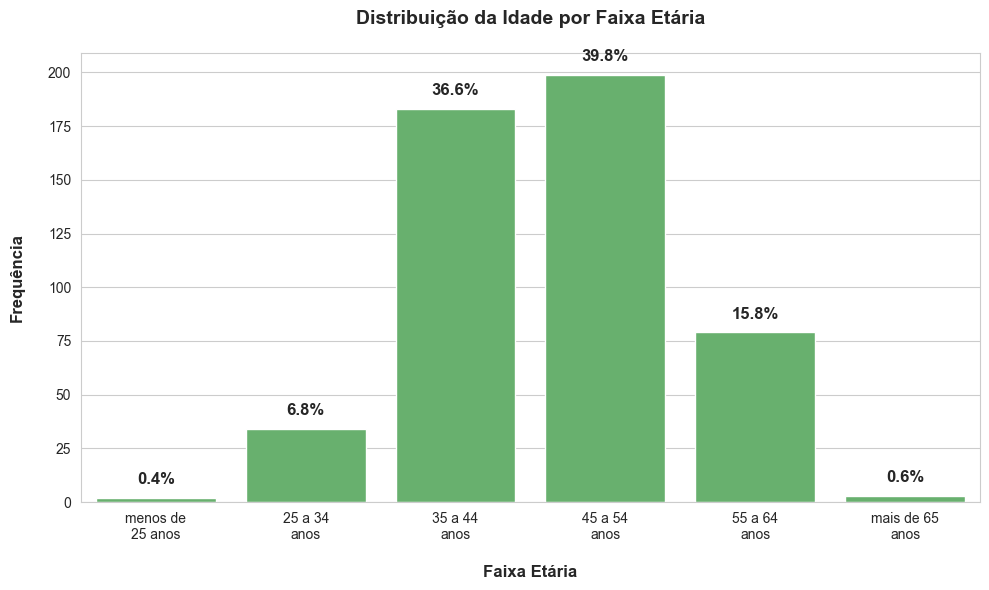

In [22]:
# Conta a frequência de cada faixa etária
age_group_counts = df['AGE_GROUP'].value_counts().sort_index()

# Calcula o total para o percentual
total = age_group_counts.sum()

# Converte para DataFrame
age_group_df = age_group_counts.reset_index()
age_group_df.columns = ['AGE_GROUP', 'Count']

# Quebra os rótulos longos do eixo X
x_labels = [textwrap.fill(str(label), width=10) for label in age_group_df['AGE_GROUP']]

# Ajuste do tamanho da figura
plt.figure(figsize=(10, 6))

# Criação do barplot
ax = sns.barplot(data=age_group_df, x='AGE_GROUP', y='Count',
                 palette=['#5cbc64'], edgecolor='#fff')

# Aplicar os rótulos com quebra ao eixo X
ax.set_xticklabels(x_labels)

# Título e rótulos
plt.title('Distribuição da Idade por Faixa Etária\n', fontsize=14, fontweight='bold')
plt.xlabel('\nFaixa Etária', fontsize=12, fontweight='bold')
plt.ylabel('Frequência\n', fontsize=12, fontweight='bold')

# Adicionando os percentuais sobre as barras
for i, count in enumerate(age_group_df['Count']):
    percentage = (count / total) * 100
    ax.text(i, count + total * 0.01, f'{percentage:.1f}%', 
            ha='center', va='bottom', fontsize=12, fontweight='bold')

# Layout final
plt.tight_layout()
plt.show()


#### 4.1.2. O gênero dos clientes está balanceado?

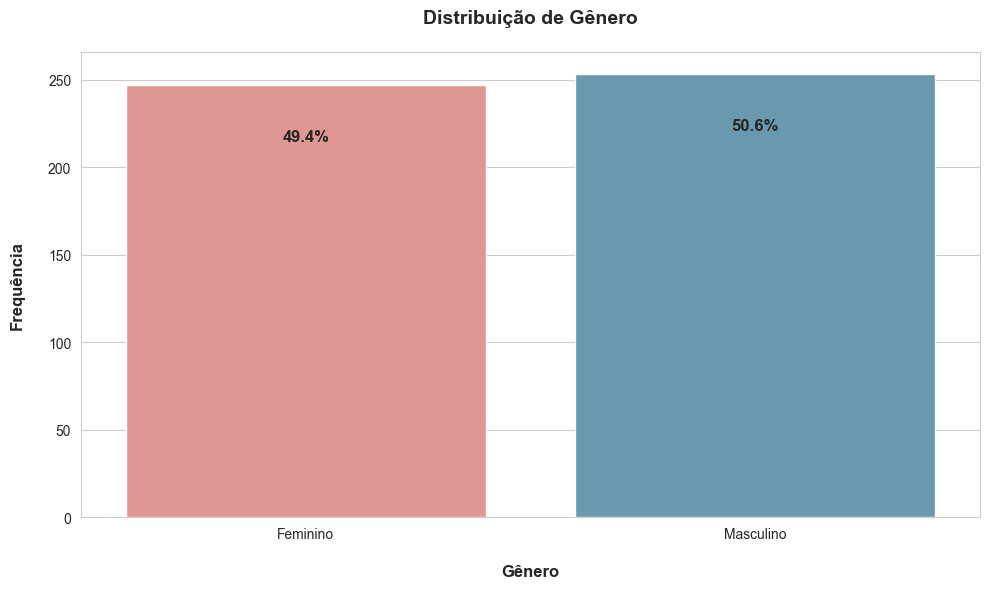

In [23]:
# Conta a frequência de cada gênero
gender_counts = df['Gender'].value_counts().sort_index()

# Calcula o total para o percentual
total = gender_counts.sum()

# Ajuste do tamanho da figura
plt.figure(figsize=(10, 6))

# Criação do barplot
ax = sns.barplot(x=gender_counts.index, y=gender_counts.values,
    palette=['#ea8c87', '#5d9eba'], edgecolor='#fff'
)

# Alterando os valores do rótulos
ax.set_xticks([0, 1])
ax.set_xticklabels(['Feminino', 'Masculino'])

# Título e rótulos
plt.title('Distribuição de Gênero\n', fontsize=14, fontweight='bold')
plt.xlabel('\nGênero', fontsize=12, fontweight='bold')
plt.ylabel('Frequência\n', fontsize=12, fontweight='bold')

# Adicionando os percentuais sobre as barras
for i, count in enumerate(gender_counts.values):
    percentage = (count / total) * 100
    ax.text(i, count - total * 0.05, f'{percentage:.1f}%', 
            ha='center', va='top', fontsize=12, fontweight='bold')

# Layout final
plt.tight_layout()
plt.show()

#### 4.1.3. Há diferença de idade média entre gêneros?

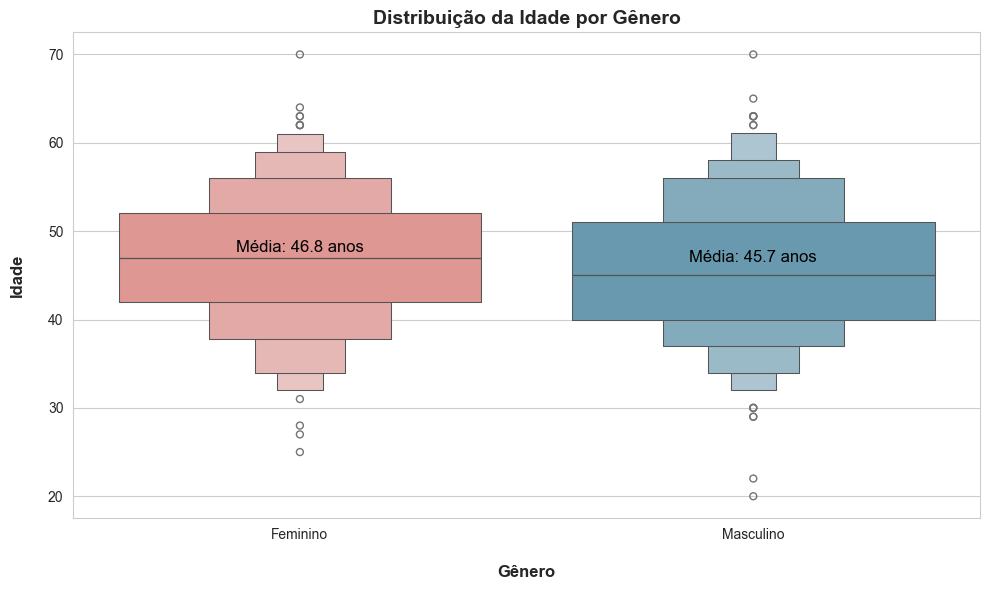

In [24]:
# Ajuste do tamanho da figura
plt.figure(figsize=(10, 6))

# Calcula a média de idade por gênero
media_idade = df.groupby('Gender')['Age'].mean()

# Gráfico da idade por gênero
ax = sns.boxenplot(data=df, x='Gender', y='Age', palette=['#ea8c87', '#5d9eba'])

# Adiciona anotações de média
for i, gender in enumerate(media_idade.index):
    media = media_idade[gender]
    ax.text(i, media + 0.5, f'Média: {media:.1f} anos', 
            ha='center', va='bottom', fontsize=12, color='#000')

# Alterando os valores do rótulos
ax.set_xticks([0, 1])
ax.set_xticklabels(['Feminino', 'Masculino'])

# Título e rótulos
plt.title('Distribuição da Idade por Gênero', fontsize=14, fontweight='bold')
plt.xlabel('\nGênero', fontsize=12, fontweight='bold')
plt.ylabel('Idade\n', fontsize=12, fontweight='bold')

# Layout final
plt.tight_layout()
plt.show()

#### 4.1.4. O valor médio de compra difere entre gêneros?

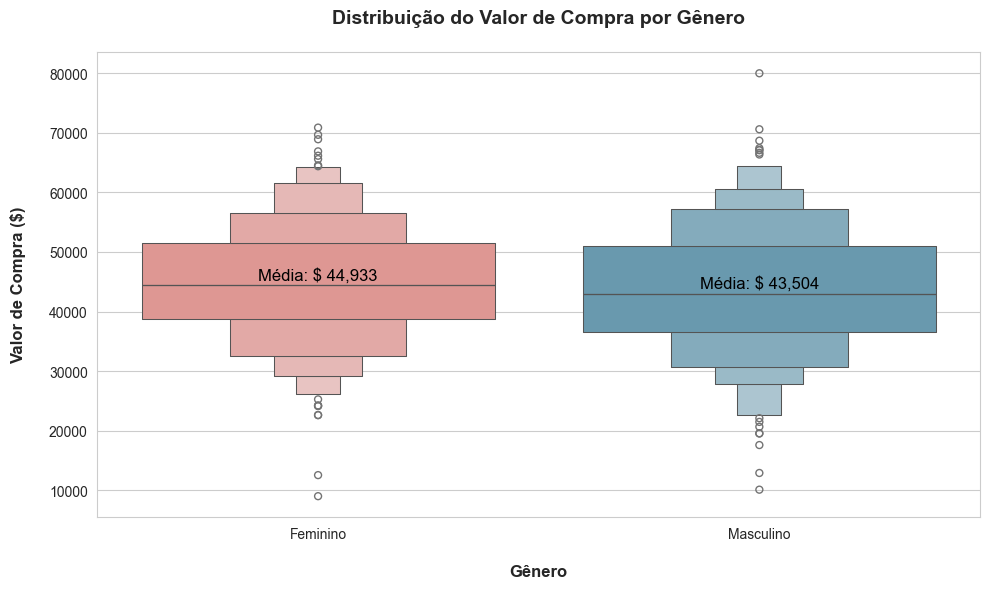

In [25]:
# Ajuste do tamanho da figura
plt.figure(figsize=(10, 6))

# Cálculo a média de compra por gênero
media_compra = df.groupby('Gender')['Car Purchase Amount'].mean()

# Gráfico do valor de compra por gênero
ax = sns.boxenplot(data=df, x='Gender', y='Car Purchase Amount', 
                   palette=['#ea8c87', '#5d9eba'])

# Adiciona anotações de média
for i, gender in enumerate(media_compra.index):
    media = media_compra[gender]
    ax.text(i, media + 0.5, f'Média: $ {media:,.0f}', 
            ha='center', va='bottom', fontsize=12, color='#000')

# Alterando os valores do rótulos
ax.set_xticks([0, 1])
ax.set_xticklabels(['Feminino', 'Masculino'])

# Título e rótulos
plt.title('Distribuição do Valor de Compra por Gênero\n', fontsize=14, fontweight='bold')
plt.xlabel('\nGênero', fontsize=12, fontweight='bold')
plt.ylabel('Valor de Compra ($)\n', fontsize=12, fontweight='bold')

# Layout final
plt.tight_layout()
plt.show()


#### 4.1.5. Idade influencia o valor do carro comprado?

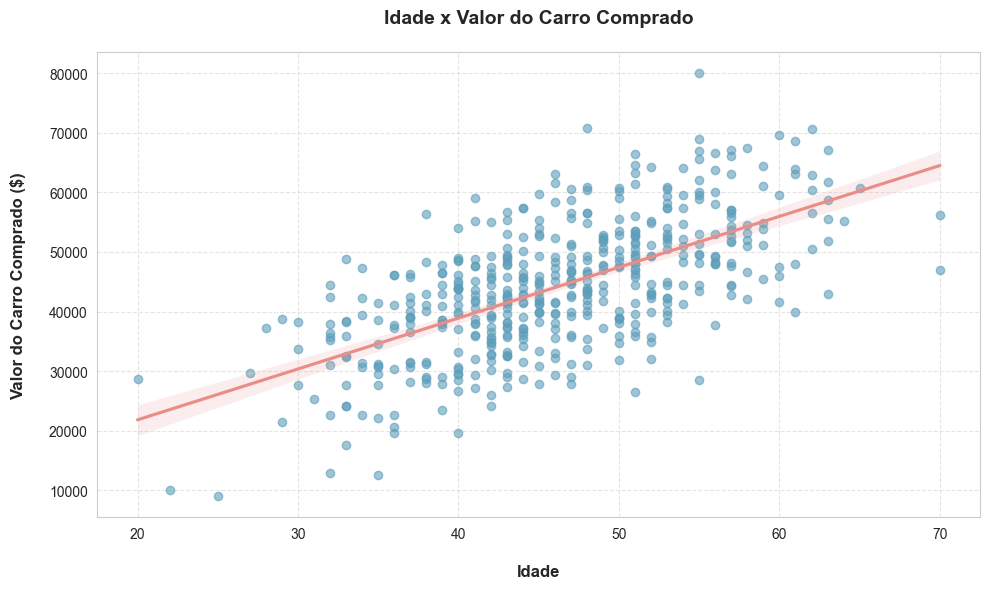

In [26]:
# Ajuste do tamanho da figura
plt.figure(figsize=(10, 6))

# Gráfico do valor de compra por idade
sns.regplot(data=df, x='Age', y='Car Purchase Amount',
    scatter_kws={'alpha': 0.6, 'color': '#5d9eba'}, line_kws={'color': '#ea8c87'})

# Títulos e rótulos
plt.title('Idade x Valor do Carro Comprado\n', fontsize=14, fontweight='bold')
plt.xlabel('\nIdade', fontsize=12, fontweight='bold')
plt.ylabel('Valor do Carro Comprado ($)\n', fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)

# Layout final
plt.tight_layout()
plt.show()


#### 4.1.6. Existe uma faixa etária que tende a gastar mais?

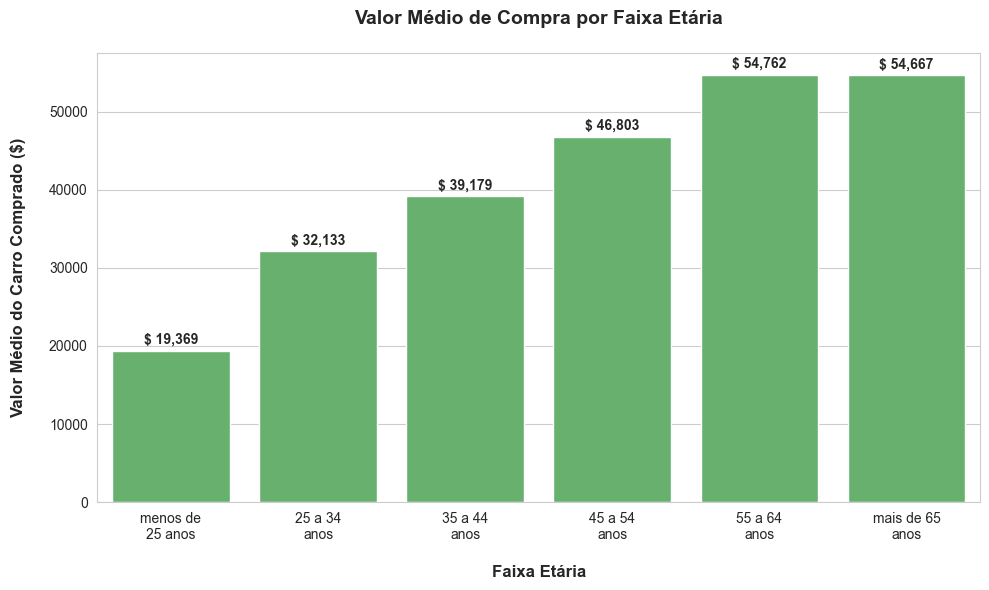

In [27]:
# Calcular valor médio de compra por faixa etária
age_group_avg = df.groupby('AGE_GROUP')['Car Purchase Amount'].mean().reset_index()

# Usa textwrap para quebrar automaticamente os rótulos longos do eixo x
x_labels = [textwrap.fill(str(label), width=10) for label in age_group_avg['AGE_GROUP']]

# Ajuste do tamanho da figura
plt.figure(figsize=(10, 6))

# Criação do barplot
ax = sns.barplot(data=age_group_avg, x='AGE_GROUP', y='Car Purchase Amount',
                 palette=['#5cbc64'], edgecolor='#fff')

# Aplicar os rótulos com quebra ao eixo X
ax.set_xticklabels(x_labels)

# Título e rótulos
plt.title('Valor Médio de Compra por Faixa Etária\n', fontsize=14, fontweight='bold')
plt.xlabel('\nFaixa Etária', fontsize=12, fontweight='bold')
plt.ylabel('Valor Médio do Carro Comprado ($)\n', fontsize=12, fontweight='bold')

# Adicionar valores nas barras
for index, row in age_group_avg.iterrows():
    plt.text(index, row['Car Purchase Amount'] + 500,
             f'$ {row["Car Purchase Amount"]:,.0f}', 
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# Layout final
plt.tight_layout()
plt.show()


### 4.2. Análise financeira

#### 4.2.1. Como é a distribuição da renda anual?

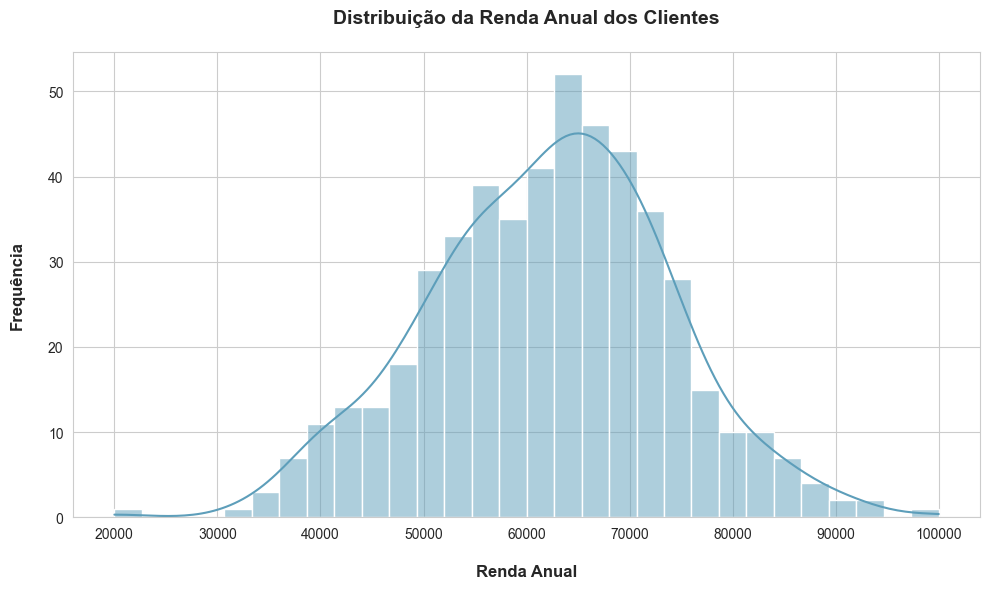

In [28]:
# Ajuste de tamanho da figura
plt.figure(figsize=(10, 6))

# Histograma com KDE
sns.histplot(data=df, x='Annual Salary', bins=30, kde=True, 
             color='#5d9eba', edgecolor='#ffffff')

# Título e labels
plt.title('Distribuição da Renda Anual dos Clientes\n', 
          fontsize=14, fontweight='bold')
plt.xlabel('\nRenda Anual', fontsize=12, fontweight='bold')
plt.ylabel('Frequência\n', fontsize=12, fontweight='bold')

# Exibe o gráfico
plt.tight_layout()
plt.show()

#### 4.2.2. Qual a relação de entre renda e valor de compra?

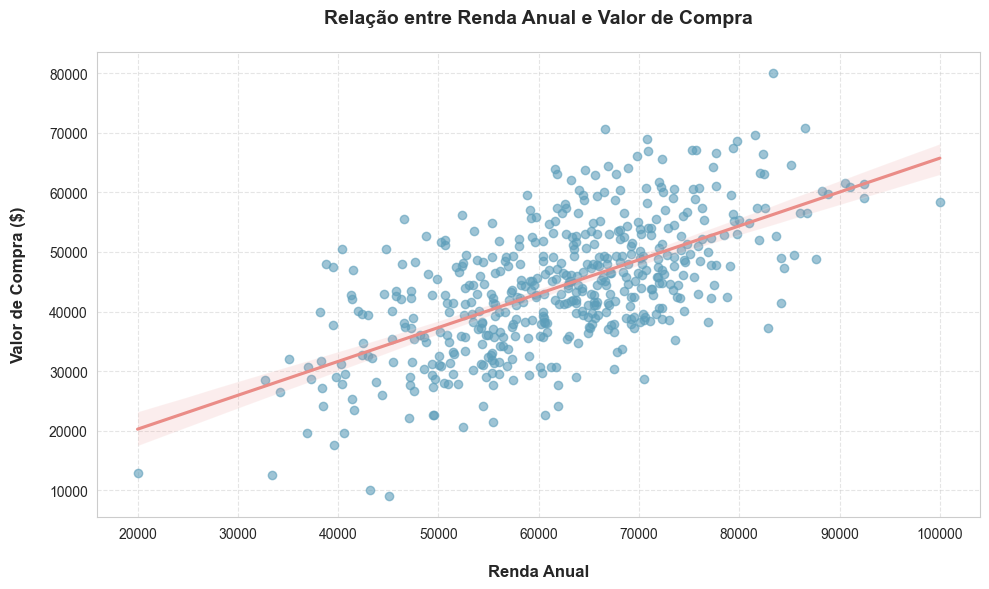

In [29]:
# Ajuste do tamanho da figura
plt.figure(figsize=(10, 6))

# Gráfico do valor de compra por renda anual
sns.regplot(data=df, x='Annual Salary', y='Car Purchase Amount',
    scatter_kws={'alpha': 0.6, 'color': '#5d9eba'}, line_kws={'color': '#ea8c87'})

# Títulos e rótulos
plt.title('Relação entre Renda Anual e Valor de Compra\n', 
          fontsize=14, fontweight='bold')
plt.xlabel('\nRenda Anual', fontsize=12, fontweight='bold')
plt.ylabel('Valor de Compra ($)\n', fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)

# Layout final
plt.tight_layout()
plt.show()

#### 4.2.3. Clientes com mais dívida compram carros mais caros?

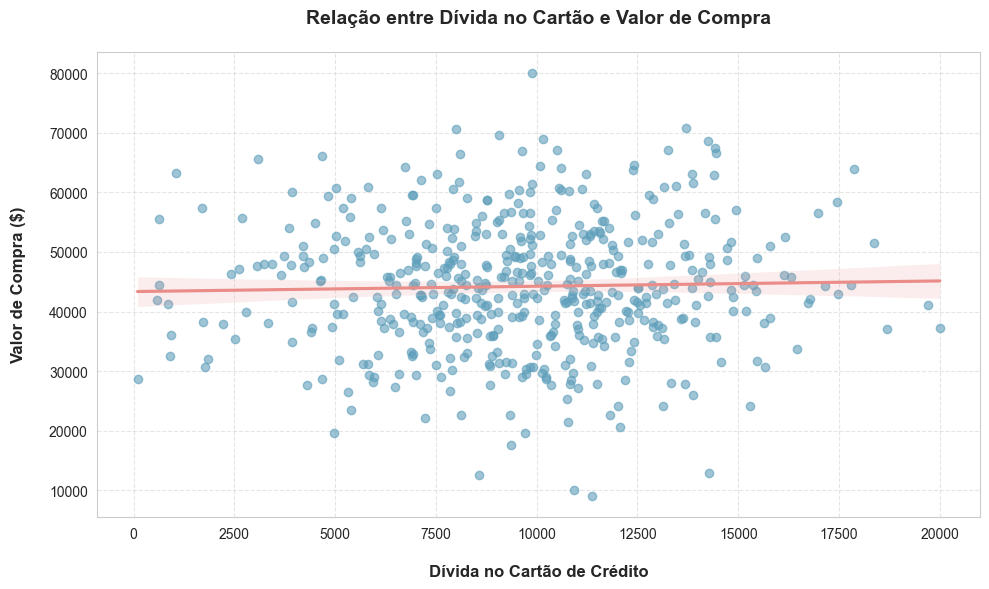

In [30]:
# Ajuste do tamanho da figura
plt.figure(figsize=(10, 6))

# Gráfico do valor de compra por dívida no cartão de crédito
sns.regplot(data=df, x='Credit Card Debt', y='Car Purchase Amount',
    scatter_kws={'alpha': 0.6, 'color': '#5d9eba'}, line_kws={'color': '#ea8c87'})

# Títulos e rótulos
plt.title('Relação entre Dívida no Cartão e Valor de Compra\n', 
          fontsize=14, fontweight='bold')
plt.xlabel('\nDívida no Cartão de Crédito', fontsize=12, fontweight='bold')
plt.ylabel('Valor de Compra ($)\n', fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)

# Layout final
plt.tight_layout()
plt.show()

#### 4.2.4. O patrimônio líquido tem relação com o valor de compra?

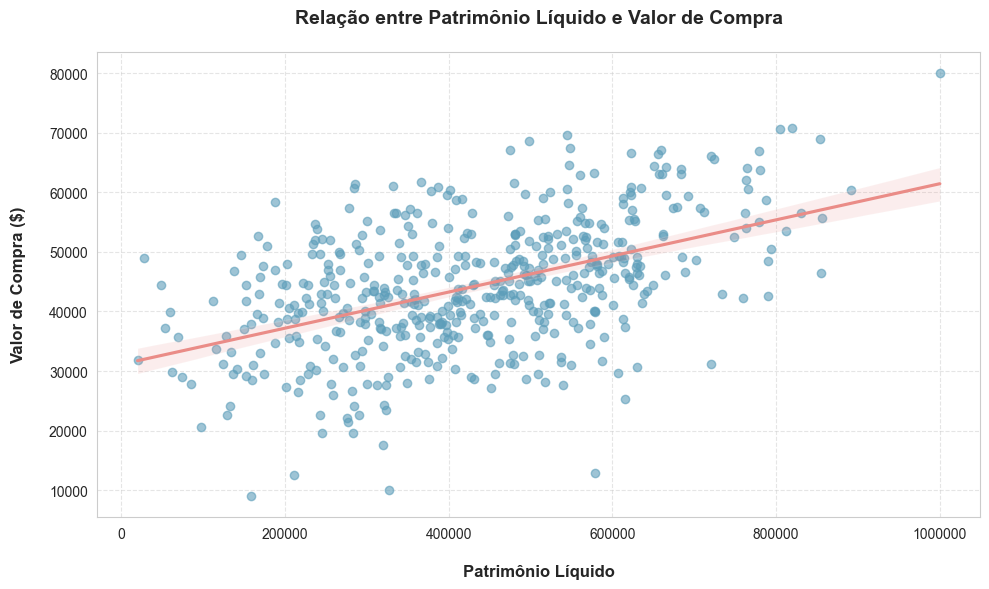

In [31]:
# Ajuste do tamanho da figura
plt.figure(figsize=(10, 6))

# Gráfico do valor de compra por patrimônio líquido
sns.regplot(data=df, x='Net Worth', y='Car Purchase Amount',
    scatter_kws={'alpha': 0.6, 'color': '#5d9eba'}, line_kws={'color': '#ea8c87'})

# Títulos e rótulos
plt.title('Relação entre Patrimônio Líquido e Valor de Compra\n', 
          fontsize=14, fontweight='bold')
plt.xlabel('\nPatrimônio Líquido', fontsize=12, fontweight='bold')
plt.ylabel('Valor de Compra ($)\n', fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)

# Exibe rótulos sem notação científica
plt.ticklabel_format(style='plain', axis='x')

# Layout final
plt.tight_layout()
plt.show()


#### 4.2.5. Renda, dívida e patrimônio são correlacionados entre si?

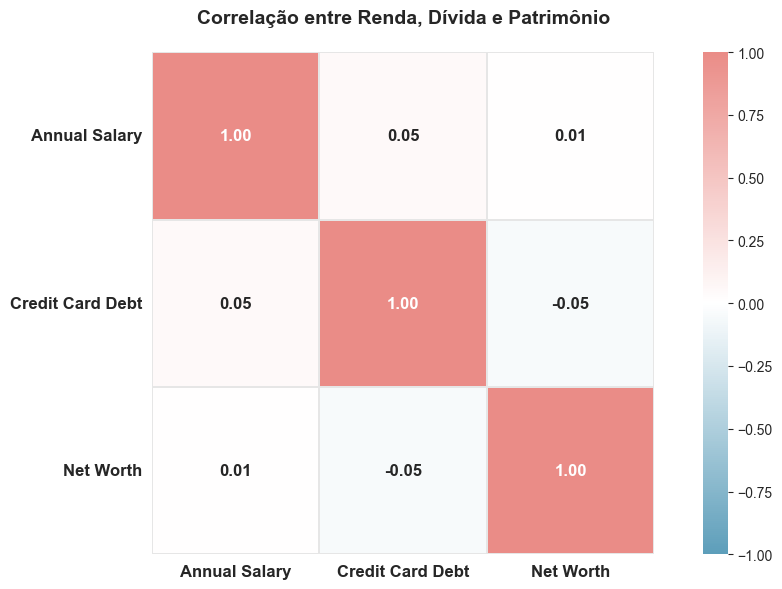

In [32]:
# Selecionar apenas as variáveis financeiras
finance_cols = ['Annual Salary', 'Credit Card Debt', 'Net Worth']

# Calcular correlação
corr_matrix = df[finance_cols].corr()

# Criar colormap personalizado
custom_cmap = LinearSegmentedColormap.from_list(
    'custom_cmap', ['#5d9eba','#ffffff', '#ea8c87'])

# Plotar heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True,  annot_kws={'size': 12, 'fontweight': 'bold'},
            linewidths=.1, linecolor='#e6e6e6', fmt='.2f', 
            cmap=custom_cmap, square=True, vmin=-1, vmax=1)

# Títulos e rótulos
plt.title('Correlação entre Renda, Dívida e Patrimônio\n',
          fontsize=14, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold', rotation=0)

# Layout final
plt.tight_layout()
plt.show()


#### 4.2.6. Quais variáveis têm maior correlação com o valor de compra?

Correlação com 'Car Purchase Amount':

Age                 0.633273
Annual Salary       0.617862
Net Worth           0.488580
Credit Card Debt    0.028882
Gender             -0.066408
Name: Car Purchase Amount, dtype: float64


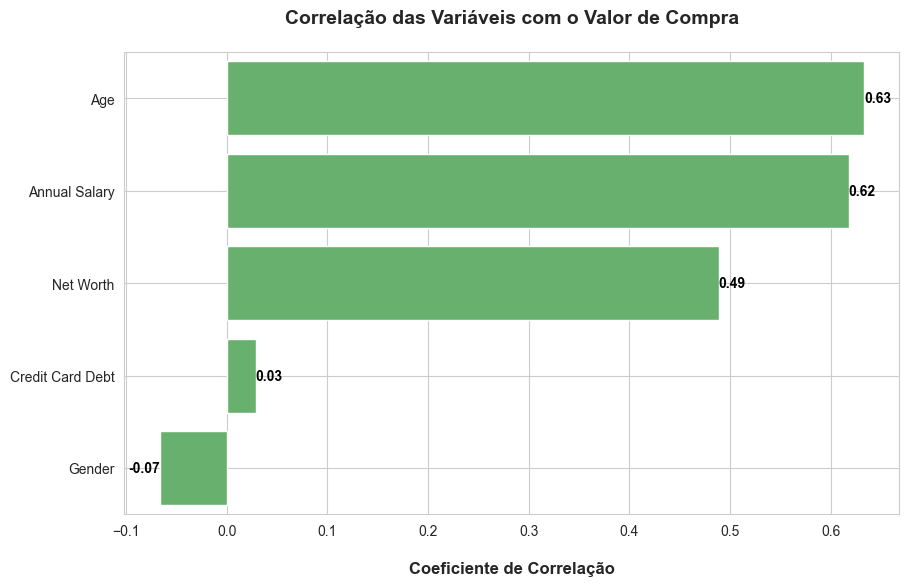

In [33]:
# Selecionar apenas colunas numéricas
numeric_cols = df.select_dtypes(include=['int', 'float'])

# Calcular correlação com o target
correlation = numeric_cols.corr()['Car Purchase Amount'].drop('Car Purchase Amount').sort_values(ascending=False)

# Exibir como tabela
print('Correlação com \'Car Purchase Amount\':\n')
print(correlation)

# Ajuste do tamanho da figura
plt.figure(figsize=(10, 6))

# Criação do barplot
ax = sns.barplot(x=correlation.values, y=correlation.index, palette=['#5cbc64'])

# Título e rótulos
plt.title('Correlação das Variáveis com o Valor de Compra\n', fontsize=14, fontweight='bold')
plt.xlabel('\nCoeficiente de Correlação', fontsize=12, fontweight='bold')
plt.ylabel('', fontsize=12, fontweight='bold')

# Incluir os valores dentro das barras
for i, (value, name) in enumerate(zip(correlation.values, correlation.index)):
    ax.text(value, i, f'{value:.2f}', va='center', ha='left' if value > 0 else 'right', 
            fontsize=10, color='black', weight='bold')

# Layout final
plt.grid(True)
plt.show()

## 5. Insights e recomendações